<a href="https://colab.research.google.com/github/anaazzahra/MINPRO-4-Predict-Customer-Clicked-Ads-Classification-by-Using-Machine-Learning/blob/main/TASK1_Predict_Customer_Clicked_Ads_Classification_by_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Library
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Connecting to data source
from google.colab import drive
drive.mount('/content/drive')

#Load data
df = pd.read_csv('/content/drive/MyDrive/Rakamin Academy/DS JAP/miniproject/minpro 4/Clicked Ads Dataset.csv')

Mounted at /content/drive


In [3]:
#Load Data
df.head(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


# **EXPLORATORY DATA ANALYSIS**

## **Descriptive Statistics**

In [4]:
df.info() #Checking data type and column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [5]:
#Rename column
df.rename(columns={'Unnamed: 0':'cust_code',
                   'Male': 'Gender'}, inplace=True)

#Changing data type
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M')

Note:

- Rename 'Unnamed' column to 'Customer_Code' because there was no customer name or id

- Changing 'Timestamp' data type from object to datetime

- Rename 'Male' column to 'Gender'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   cust_code                 1000 non-null   int64         
 1   Daily Time Spent on Site  987 non-null    float64       
 2   Age                       1000 non-null   int64         
 3   Area Income               987 non-null    float64       
 4   Daily Internet Usage      989 non-null    float64       
 5   Gender                    997 non-null    object        
 6   Timestamp                 1000 non-null   datetime64[ns]
 7   Clicked on Ad             1000 non-null   object        
 8   city                      1000 non-null   object        
 9   province                  1000 non-null   object        
 10  category                  1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 86.1+ KB


In [7]:
df.sample(3)

,cust_code,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category
248,248,42.44,56,304150770.0,168.27,Perempuan,2016-02-10 15:23:00,Yes,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Otomotif
49,49,48.01,46,380002700.0,119.93,Perempuan,2016-04-25 11:01:00,Yes,Palembang,Sumatra Selatan,Furniture
526,526,43.65,39,445543280.0,138.87,Perempuan,2016-05-08 22:24:00,Yes,Cimahi,Jawa Barat,Health


In [26]:
df.describe()

,cust_code,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Timestamp
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000,1000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620,2016-04-10 10:33:36.840000
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000,2016-01-01 02:52:00
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000,2016-02-18 02:55:15
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000,2016-04-07 17:27:00
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000,2016-05-31 03:18:00
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000,2016-07-24 00:22:00
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142,NaN


## **Univariate Analysis**

### **Numerical Feature**

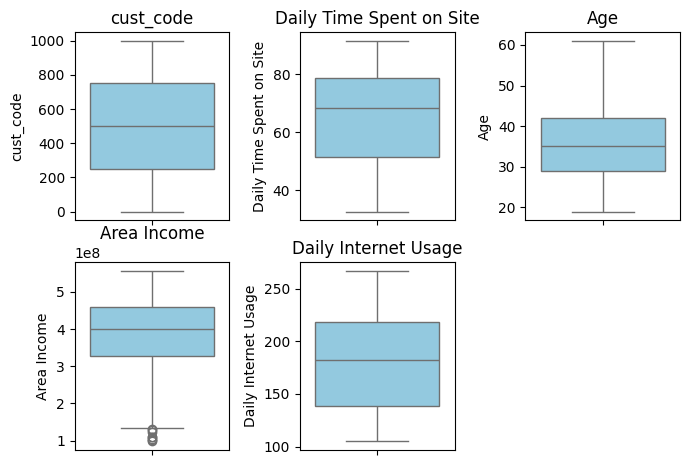

In [48]:
numericals = ['cust_code', 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
features = numericals
# Setting size of bloxplot
plt.figure(figsize=(7, 7))

# Creating subplot for each feature
for i in range(len(features)):
    plt.subplot(3, 3, i + 1)  # Setting bloxpot in grid 2x3
    sns.boxplot(y=df[features[i]], color='skyblue', orient='v')
    plt.title(features[i])  # Adding title for each subplot

plt.tight_layout()  # Setting layout
plt.show()


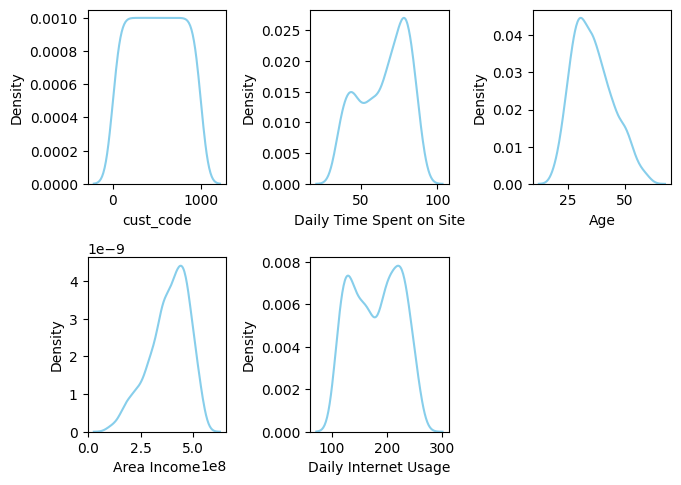

In [49]:
#Checking distribution of numerical feature
plt.figure(figsize=(7, 7)) #setting size

#create distplot
for i in range(len(features)):
  plt.subplot(3, 3, i + 1)
  sns.kdeplot(x=df[features[i]], color='skyblue')
  plt.xlabel(features[i])

plt.tight_layout()
plt.show()

Interpretation:

- Daily Internet Usage and Daily Time on Site have two peaks. These mean, there are two groups of users, namely those who spend little time on sites and tend to use the internet little and people who spend a lot of time on sites and have higher internet usage.

- Based on Age, the majority of users are aged 30-45 years old.

- Area Income indicates negative skewed. Showing that most area incomes are in the lower range but with some areas having higher incomes.

### **Categorical Features**

In [53]:
Cats = ['Gender', 'Clicked on Ad', 'city', 'province', 'category']

In [54]:
df[Cats].describe()

,Gender,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000
unique,2,2,30,16,10
top,Perempuan,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,500,64,253,112


In [55]:
#showing value of cats
for col in Cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Gender:
Gender
Perempuan    518
Laki-Laki    479
Name: count, dtype: int64

Value count kolom Clicked on Ad:
Clicked on Ad
No     500
Yes    500
Name: count, dtype: int64

Value count kolom city:
city
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Serang               11
Name: count, dtype: int64

Value count kolom province:
provin

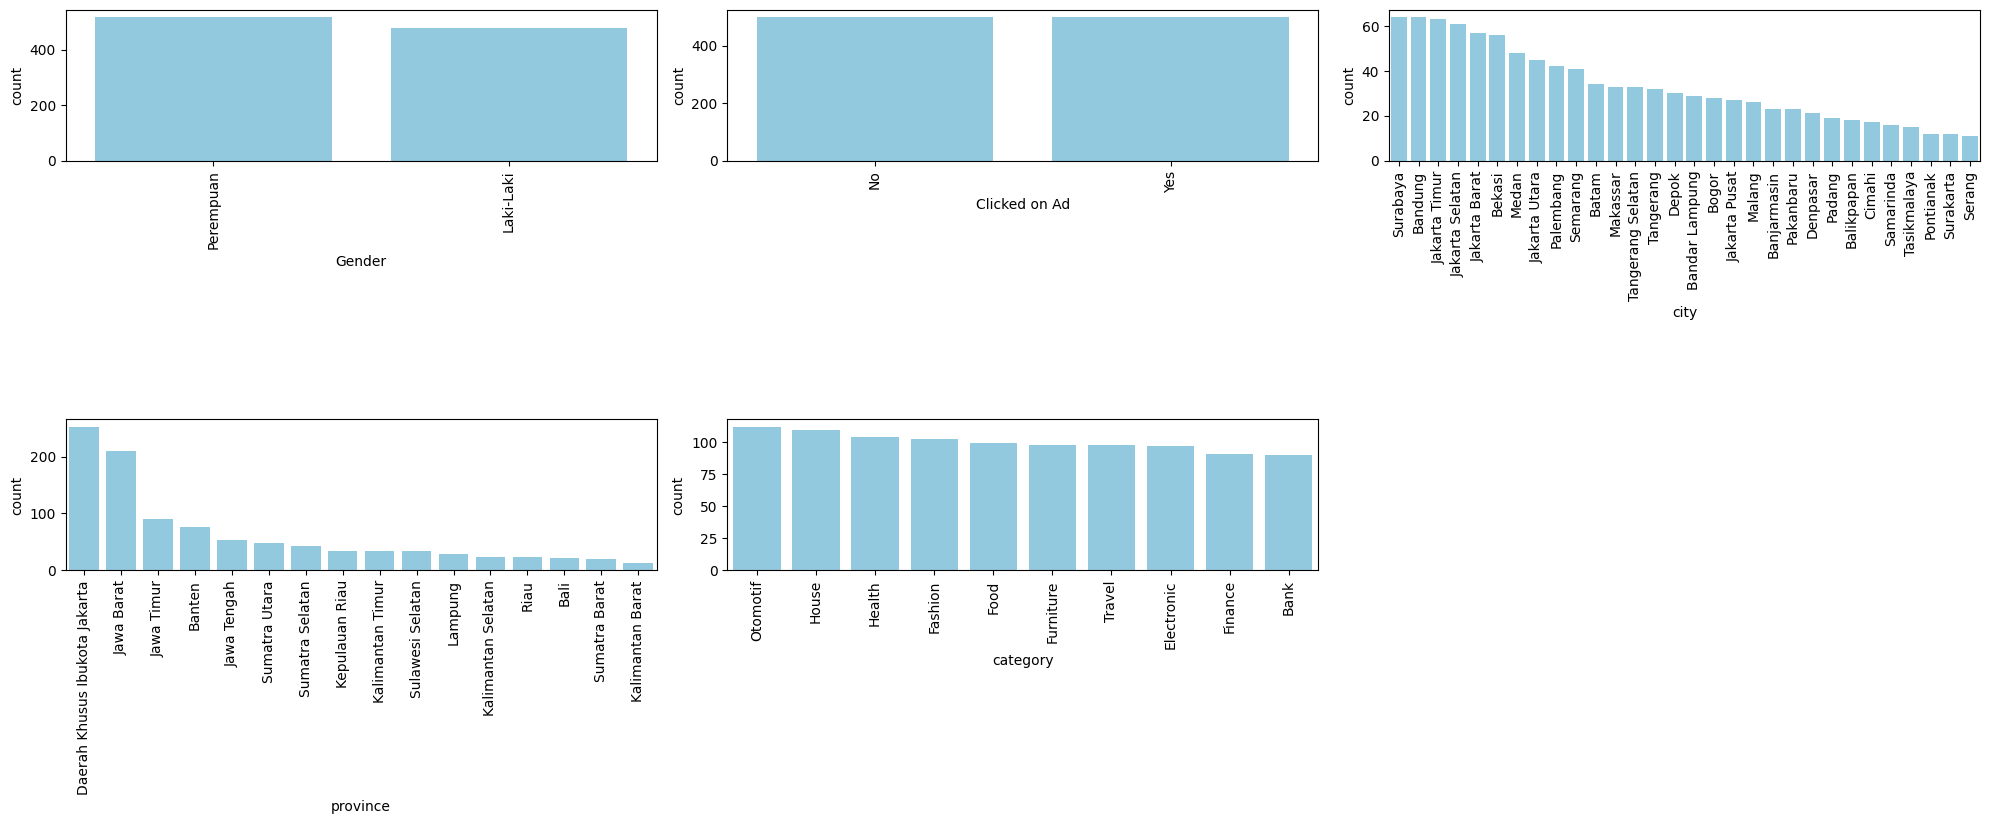

In [68]:
#Create plot for cats columns
features = Cats
plt.figure(figsize=(20, 10))

for i in range(0, len(features)):
  plt.subplot(3, 3, i+1)
  order = df[features[i]].value_counts().index #order data by DESC
  sns.countplot(x=df[features[i]], order=order, color='skyblue')
  plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Based on Categorical Features, caracteristics of customers are:
1. Female is more dominated than the male
2. Both of 'Yes' and 'No' for click on ad have the same values
3. Most customers live in cities and provinces on the island of Java
4. The initial five categories are Otomotif, House, Health, Fashion, dan Food.

# **TASK 1**

## **ANALISYS UNIVARIATE FOR REQUIRED COLUMN**

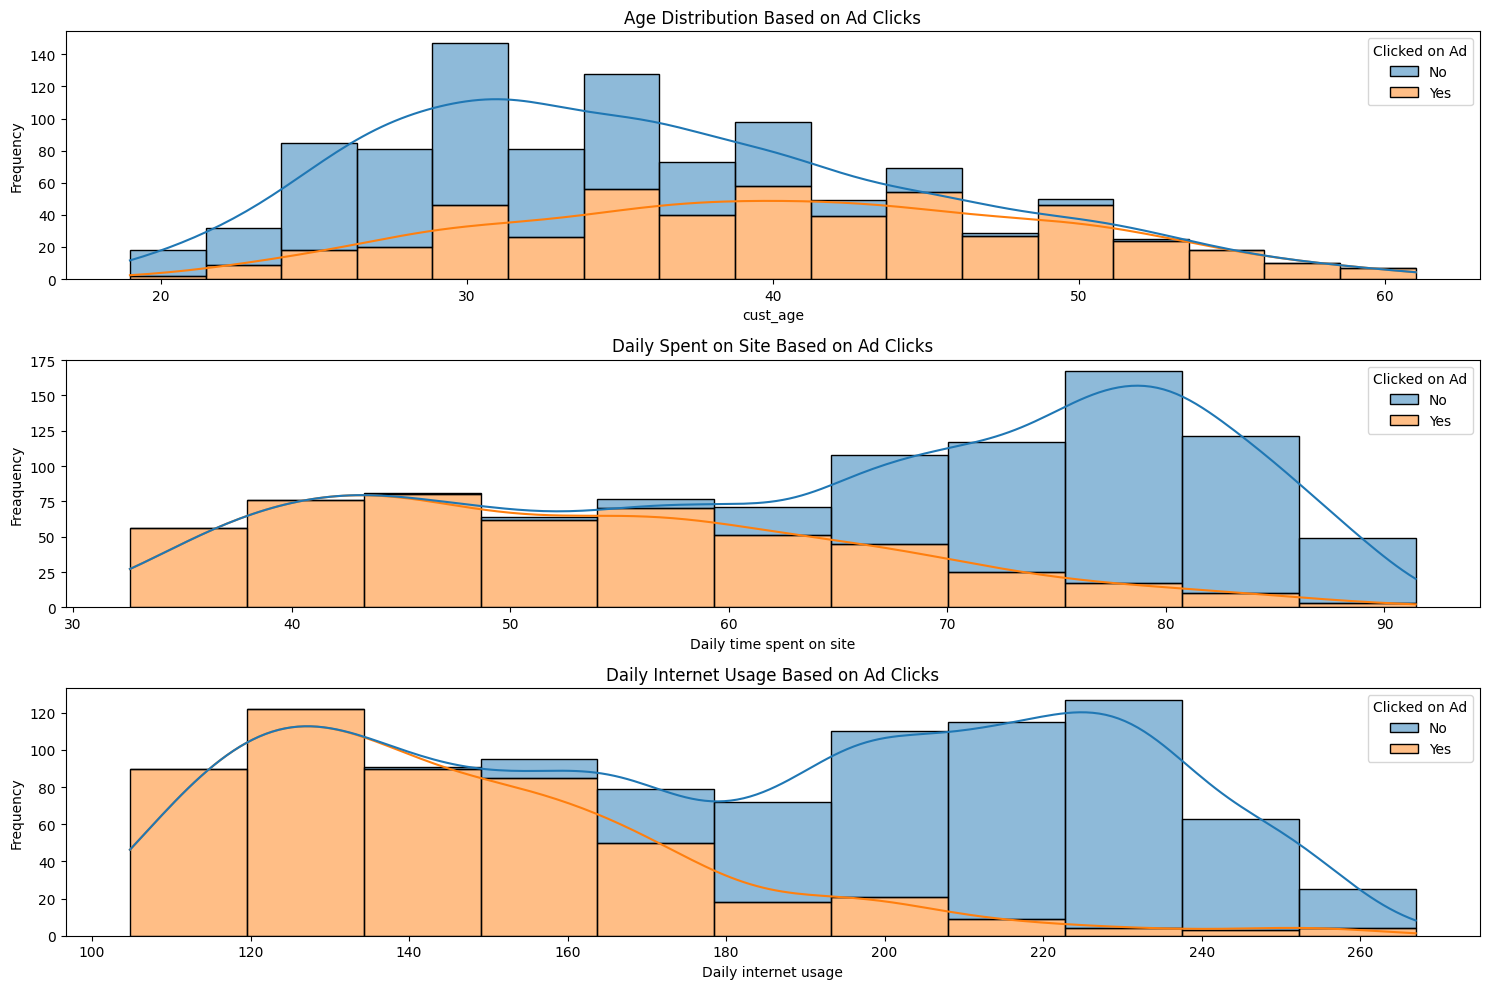

In [8]:
#creating plot for each column

plt.figure(figsize=(15, 10)) #Setting size's plot

#Plot for age
plt.subplot(3, 1, 1)
sns.histplot(data=df, x='Age', hue='Clicked on Ad', multiple='stack', kde=True)
plt.title('Age Distribution Based on Ad Clicks')
plt.xlabel('cust_age')
plt.ylabel('Frequency')

#Plot for 'Daily Time Spent on Site'
plt.subplot(3,1,2)
sns.histplot(data=df, x='Daily Time Spent on Site', hue='Clicked on Ad', multiple='stack', kde=True)
plt.title('Daily Spent on Site Based on Ad Clicks')
plt.xlabel('Daily time spent on site')
plt.ylabel('Freaquency')

#Plot for 'Daily Internet Usage'
plt.subplot(3,1,3)
sns.histplot(data=df, x='Daily Internet Usage', hue='Clicked on Ad', multiple='stack', kde=True)
plt.title('Daily Internet Usage Based on Ad Clicks')
plt.xlabel('Daily internet usage')
plt.ylabel('Frequency')

#Showing Plot
plt.tight_layout()
plt.show()


Interpretation:

A. Plot 1 (Age Distribution Based on Ad Click)

- Customer aged 20-40 years dominated

- Customers aged 41-60 years click more on ads than young people

B. Plot 2 (Daily Time Spent on Site Based on Ad Clicks)

- The less time customers spend on the web, the more ad clicks. However, customers who spend more time a day on the site click on ads very rarely.

C. Plot 3 (Daily Internet Usage Based on Ad Clicks)

- Customers who use little internet are more likely to click on ads frequently than those who use a lot of internet in a day

## **ANALISYS BIVARIATE**

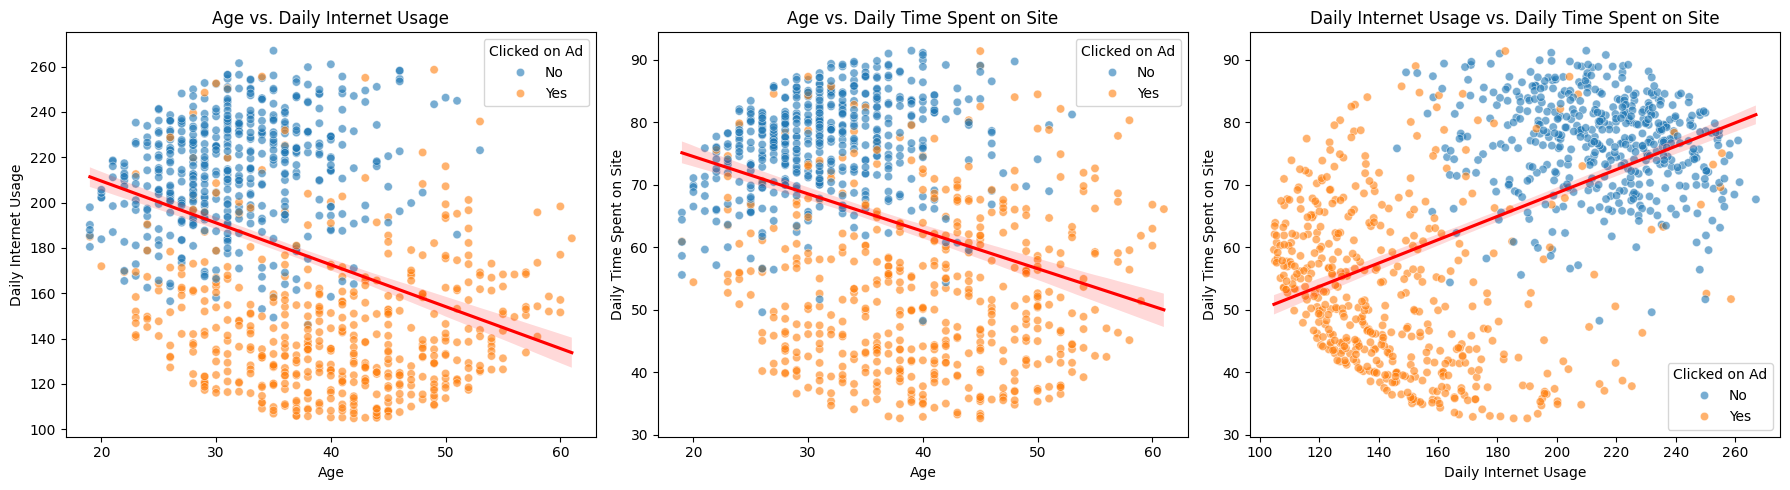

In [9]:
# Menyiapkan plot
plt.figure(figsize=(18, 5))

# Plot hubungan antara age dan daily_internet_usage dengan garis regresi
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Age', y='Daily Internet Usage', hue='Clicked on Ad', alpha=0.6)
sns.regplot(data=df, x='Age', y='Daily Internet Usage', scatter=False, color='red')
plt.title('Age vs. Daily Internet Usage')
plt.xlabel('Age')
plt.ylabel('Daily Internet Usage')

# Plot hubungan antara age dan daily_time_spent_on_site dengan garis regresi
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Age', y='Daily Time Spent on Site', hue='Clicked on Ad', alpha=0.6)
sns.regplot(data=df, x='Age', y='Daily Time Spent on Site', scatter=False, color='red')
plt.title('Age vs. Daily Time Spent on Site')
plt.xlabel('Age')
plt.ylabel('Daily Time Spent on Site')

# Plot hubungan antara daily_internet_usage dan daily_time_spent_on_site dengan garis regresi
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Daily Internet Usage', y='Daily Time Spent on Site', hue='Clicked on Ad', alpha=0.6)
sns.regplot(data=df, x='Daily Internet Usage', y='Daily Time Spent on Site', scatter=False, color='red')
plt.title('Daily Internet Usage vs. Daily Time Spent on Site')
plt.xlabel('Daily Internet Usage')
plt.ylabel('Daily Time Spent on Site')

# Menampilkan plot
plt.tight_layout()
plt.show()


Interpretation:

A. Plot 1 (Age and Daily Internet Usage)

- There is no significant relationship between age and daily internet usege. In other words, age does not affect daily internet usege and vice versa

- The scatter plot shows that age and daily internet usege have negative values

B. Plot 2 (Age and Daily Time Spent on Site)

- The plot also indicates that age and daily time spent on site have negative values

C. Plot 3 (Daily Internet Usage and Daily Time Spent on Site)

- The plot depicts that daily internet usage and daily time spent on site have positive value. So to prove this, it is necessary to test the causal influence for more detail

## **ANALISYS MULTIVARIATE**

In [36]:
#count correlation
numerical_df = df.select_dtypes(include=[float, int])

numerical_df.corr()

,cust_code,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
cust_code,1.000000,-0.032637,0.001835,-0.056862,-0.004842
Daily Time Spent on Site,-0.032637,1.000000,-0.331424,0.308266,0.518294
Age,0.001835,-0.331424,1.000000,-0.179343,-0.370481
Area Income,-0.056862,0.308266,-0.179343,1.000000,0.338080
Daily Internet Usage,-0.004842,0.518294,-0.370481,0.338080,1.000000


<Axes: >

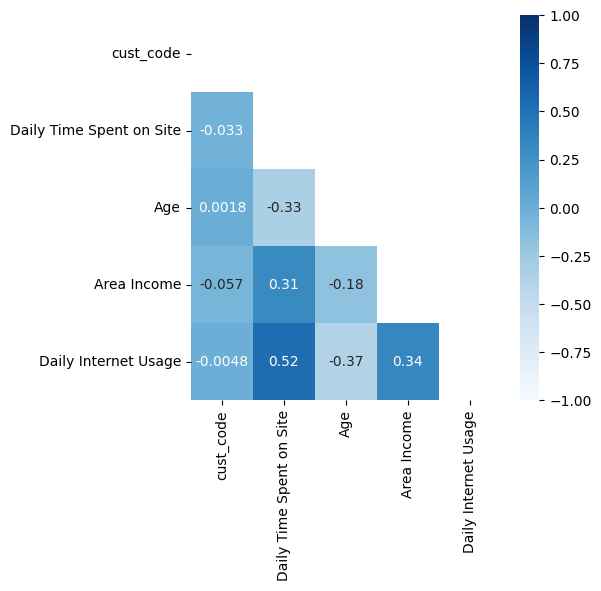

In [25]:
mask = np.triu(np.ones_like(numerical_df.corr(), dtype=bool))
plt.figure(figsize=(5,5))
sns.heatmap(numerical_df.corr(), mask=mask, cmap='Blues', vmin=-1, vmax=1, annot=True)


Interpretation:

- Only columns Daily Internet Usage and Daily Time Spent on Site with values up to 0.52. Showed that more time spent on sites was associated with more daily internet use.

- Daily Internet Usage and Area Income have a  positive correlation (0.34). Indicating people who have high incomes, use the internet more in a day.

- The positive correlation was moderate with Area Income (0.31), indicating that more time spent on the site may be associated with higher area income.